<a href="https://colab.research.google.com/github/KaranOO/YBI-Foundation/blob/main/PROJECTS/Thyroid_Disease_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing all Libraries 

In [331]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error, r2_score

# Reading CSV File

In [332]:
df = pd.read_csv('https://www.dropbox.com/s/dut0pljmwr9do2l/ThyroidDisease.csv?dl=1')

# Info - also checking for NULL values in info()

In [333]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3772 entries, 0 to 3771
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   age                        3772 non-null   object
 1   sex                        3772 non-null   object
 2   on thyroxine               3772 non-null   object
 3   query on thyroxine         3772 non-null   object
 4   on antithyroid medication  3772 non-null   object
 5   sick                       3772 non-null   object
 6   pregnant                   3772 non-null   object
 7   thyroid surgery            3772 non-null   object
 8   I131 treatment             3772 non-null   object
 9   query hypothyroid          3772 non-null   object
 10  query hyperthyroid         3772 non-null   object
 11  lithium                    3772 non-null   object
 12  goitre                     3772 non-null   object
 13  tumor                      3772 non-null   object
 14  hypopitu

In [334]:
df.isnull().sum()

age                          0
sex                          0
on thyroxine                 0
query on thyroxine           0
on antithyroid medication    0
sick                         0
pregnant                     0
thyroid surgery              0
I131 treatment               0
query hypothyroid            0
query hyperthyroid           0
lithium                      0
goitre                       0
tumor                        0
hypopituitary                0
psych                        0
TSH measured                 0
TSH                          0
T3 measured                  0
T3                           0
TT4 measured                 0
TT4                          0
T4U measured                 0
T4U                          0
FTI measured                 0
FTI                          0
TBG measured                 0
TBG                          0
referral source              0
binaryClass                  0
dtype: int64

In [335]:
df.head()

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source,binaryClass
0,41,F,f,f,f,f,f,f,f,f,...,t,125,t,1.14,t,109,f,?,SVHC,P
1,23,F,f,f,f,f,f,f,f,f,...,t,102,f,?,f,?,f,?,other,P
2,46,M,f,f,f,f,f,f,f,f,...,t,109,t,0.91,t,120,f,?,other,P
3,70,F,t,f,f,f,f,f,f,f,...,t,175,f,?,f,?,f,?,other,P
4,70,F,f,f,f,f,f,f,f,f,...,t,61,t,0.87,t,70,f,?,SVI,P


# Handeling Categorical Data

In [336]:
df["binaryClass"].value_counts()
# positive or negative

P    3481
N     291
Name: binaryClass, dtype: int64

In [337]:
df["binaryClass"]=df["binaryClass"].map({"P":0,"N":1})

In [338]:
df["pregnant"].value_counts()
# pregnent false: 3719 and true:53

f    3719
t      53
Name: pregnant, dtype: int64

In [339]:
df=df.replace({"t":1,"f":0})

In [340]:
df.T
# now here, data seems little better... needed little bit of more work

,0,1,2,3,4,5,6,7,8,9,...,3762,3763,3764,3765,3766,3767,3768,3769,3770,3771
age,41,23,46,70,70,18,59,80,66,68,...,61,41,54,73,19,30,68,74,72,64
sex,F,F,M,F,F,F,F,F,F,M,...,M,F,M,F,F,F,F,F,M,F
on thyroxine,0,0,0,1,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
query on thyroxine,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
on antithyroid medication,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
sick,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
pregnant,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
thyroid surgery,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
I131 treatment,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
query hypothyroid,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [341]:
df.nunique()

age                           94
sex                            3
on thyroxine                   2
query on thyroxine             2
on antithyroid medication      2
sick                           2
pregnant                       2
thyroid surgery                2
I131 treatment                 2
query hypothyroid              2
query hyperthyroid             2
lithium                        2
goitre                         2
tumor                          2
hypopituitary                  2
psych                          2
TSH measured                   2
TSH                          288
T3 measured                    2
T3                            70
TT4 measured                   2
TT4                          242
T4U measured                   2
T4U                          147
FTI measured                   2
FTI                          235
TBG measured                   1
TBG                            1
referral source                5
binaryClass                    2
dtype: int

In [342]:
df.isin(['?']).sum()

age                             1
sex                           150
on thyroxine                    0
query on thyroxine              0
on antithyroid medication       0
sick                            0
pregnant                        0
thyroid surgery                 0
I131 treatment                  0
query hypothyroid               0
query hyperthyroid              0
lithium                         0
goitre                          0
tumor                           0
hypopituitary                   0
psych                           0
TSH measured                    0
TSH                           369
T3 measured                     0
T3                            769
TT4 measured                    0
TT4                           231
T4U measured                    0
T4U                           387
FTI measured                    0
FTI                           385
TBG measured                    0
TBG                          3772
referral source                 0
binaryClass   

In [343]:
# now, in above we observed a lot of values "?" so we will have to handel this now

In [344]:
df=df.replace({"?":np.NAN})
# now empty space is filled with NAN

In [345]:
df["sex"].value_counts()

F    2480
M    1142
Name: sex, dtype: int64

In [346]:
df=df.replace({"F":1,"M":0})

In [347]:
df["referral source"].value_counts()

other    2201
SVI      1034
SVHC      386
STMW      112
SVHD       39
Name: referral source, dtype: int64

In [348]:
del df["referral source"]

In [349]:
df.dtypes

age                           object
sex                          float64
on thyroxine                   int64
query on thyroxine             int64
on antithyroid medication      int64
sick                           int64
pregnant                       int64
thyroid surgery                int64
I131 treatment                 int64
query hypothyroid              int64
query hyperthyroid             int64
lithium                        int64
goitre                         int64
tumor                          int64
hypopituitary                  int64
psych                          int64
TSH measured                   int64
TSH                           object
T3 measured                    int64
T3                            object
TT4 measured                   int64
TT4                           object
T4U measured                   int64
T4U                           object
FTI measured                   int64
FTI                           object
TBG measured                   int64
T

In [350]:
col = df.columns[df.dtypes.eq('object')]
df[col] = df[col].apply(pd.to_numeric, errors='coerce')
df.dtypes

age                          float64
sex                          float64
on thyroxine                   int64
query on thyroxine             int64
on antithyroid medication      int64
sick                           int64
pregnant                       int64
thyroid surgery                int64
I131 treatment                 int64
query hypothyroid              int64
query hyperthyroid             int64
lithium                        int64
goitre                         int64
tumor                          int64
hypopituitary                  int64
psych                          int64
TSH measured                   int64
TSH                          float64
T3 measured                    int64
T3                           float64
TT4 measured                   int64
TT4                          float64
T4U measured                   int64
T4U                          float64
FTI measured                   int64
FTI                          float64
TBG measured                   int64
T

In [351]:
# Columns with NaN values
# List = ['age','TSH','T3','TT4','T4U','FTI']

In [352]:
df['sex'].fillna(df['sex'].mean(), inplace=True)
df['age'].fillna(df['age'].mean(), inplace=True)
df['TSH'].fillna(df['TSH'].mean(), inplace=True)
df['T3'].fillna(df['T3'].mean(), inplace=True)
df['TT4'].fillna(df['TT4'].mean(), inplace=True)
df['T4U'].fillna(df['T4U'].mean(), inplace=True)
df['FTI'].fillna(df['FTI'].mean(), inplace=True)

In [353]:
df.isnull().sum()

age                             0
sex                             0
on thyroxine                    0
query on thyroxine              0
on antithyroid medication       0
sick                            0
pregnant                        0
thyroid surgery                 0
I131 treatment                  0
query hypothyroid               0
query hyperthyroid              0
lithium                         0
goitre                          0
tumor                           0
hypopituitary                   0
psych                           0
TSH measured                    0
TSH                             0
T3 measured                     0
T3                              0
TT4 measured                    0
TT4                             0
T4U measured                    0
T4U                             0
FTI measured                    0
FTI                             0
TBG measured                    0
TBG                          3772
binaryClass                     0
dtype: int64

In [354]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3772 entries, 0 to 3771
Data columns (total 29 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        3772 non-null   float64
 1   sex                        3772 non-null   float64
 2   on thyroxine               3772 non-null   int64  
 3   query on thyroxine         3772 non-null   int64  
 4   on antithyroid medication  3772 non-null   int64  
 5   sick                       3772 non-null   int64  
 6   pregnant                   3772 non-null   int64  
 7   thyroid surgery            3772 non-null   int64  
 8   I131 treatment             3772 non-null   int64  
 9   query hypothyroid          3772 non-null   int64  
 10  query hyperthyroid         3772 non-null   int64  
 11  lithium                    3772 non-null   int64  
 12  goitre                     3772 non-null   int64  
 13  tumor                      3772 non-null   int64

# Visualisation on data

In [355]:
df['sex']

0       1.0
1       1.0
2       0.0
3       1.0
4       1.0
       ... 
3767    1.0
3768    1.0
3769    1.0
3770    0.0
3771    1.0
Name: sex, Length: 3772, dtype: float64

In [356]:
df['sex']=df['sex'].astype(int)

In [357]:
df['sex'].value_counts()

1    2480
0    1292
Name: sex, dtype: int64

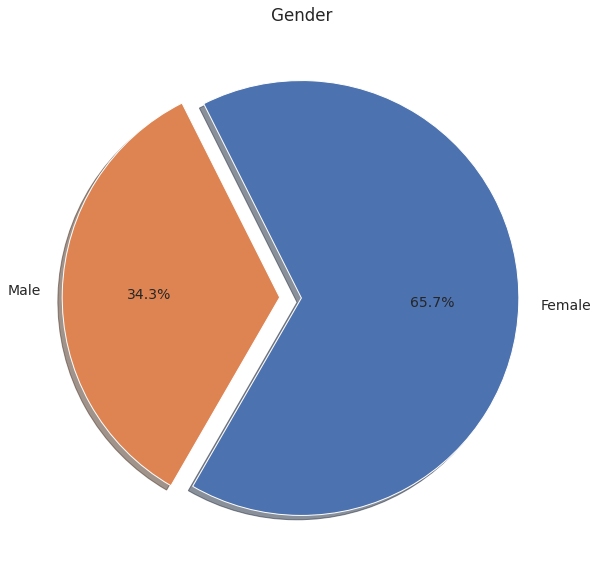

In [358]:
a = df['sex'].value_counts()
labels = 'Female','Male'
explode=(0,0.1)
fig, ax = plt.subplots(figsize=(10,10))
plt.title("Gender")
ax.pie(a,labels=labels,startangle=240,explode=explode,autopct='%1.1f%%',shadow=True,textprops={'fontsize': 14})
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


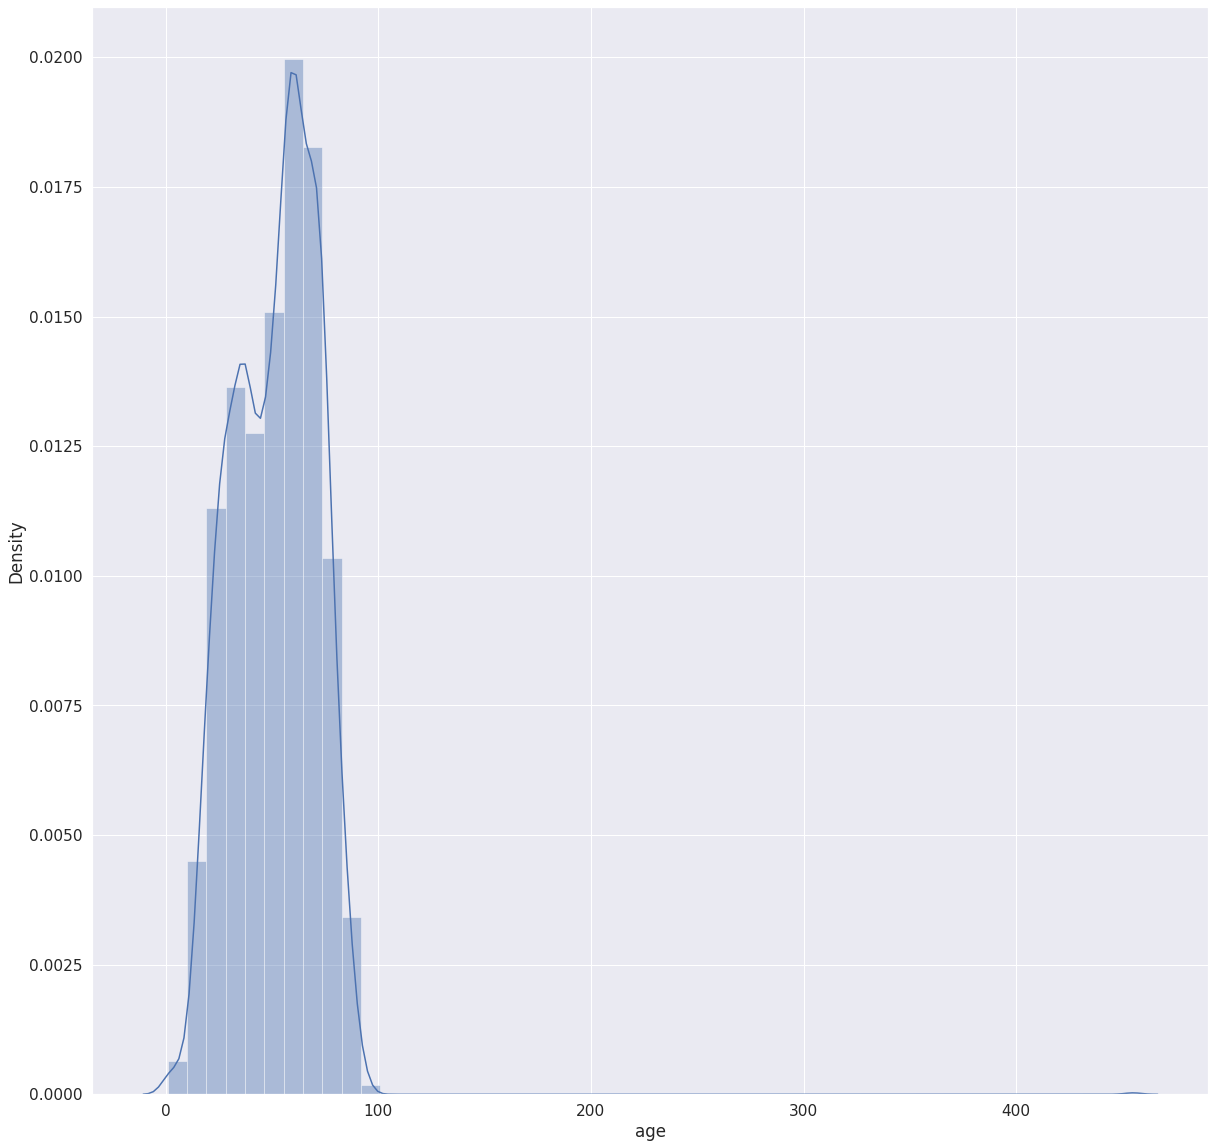

In [359]:
sns.distplot(df['age'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


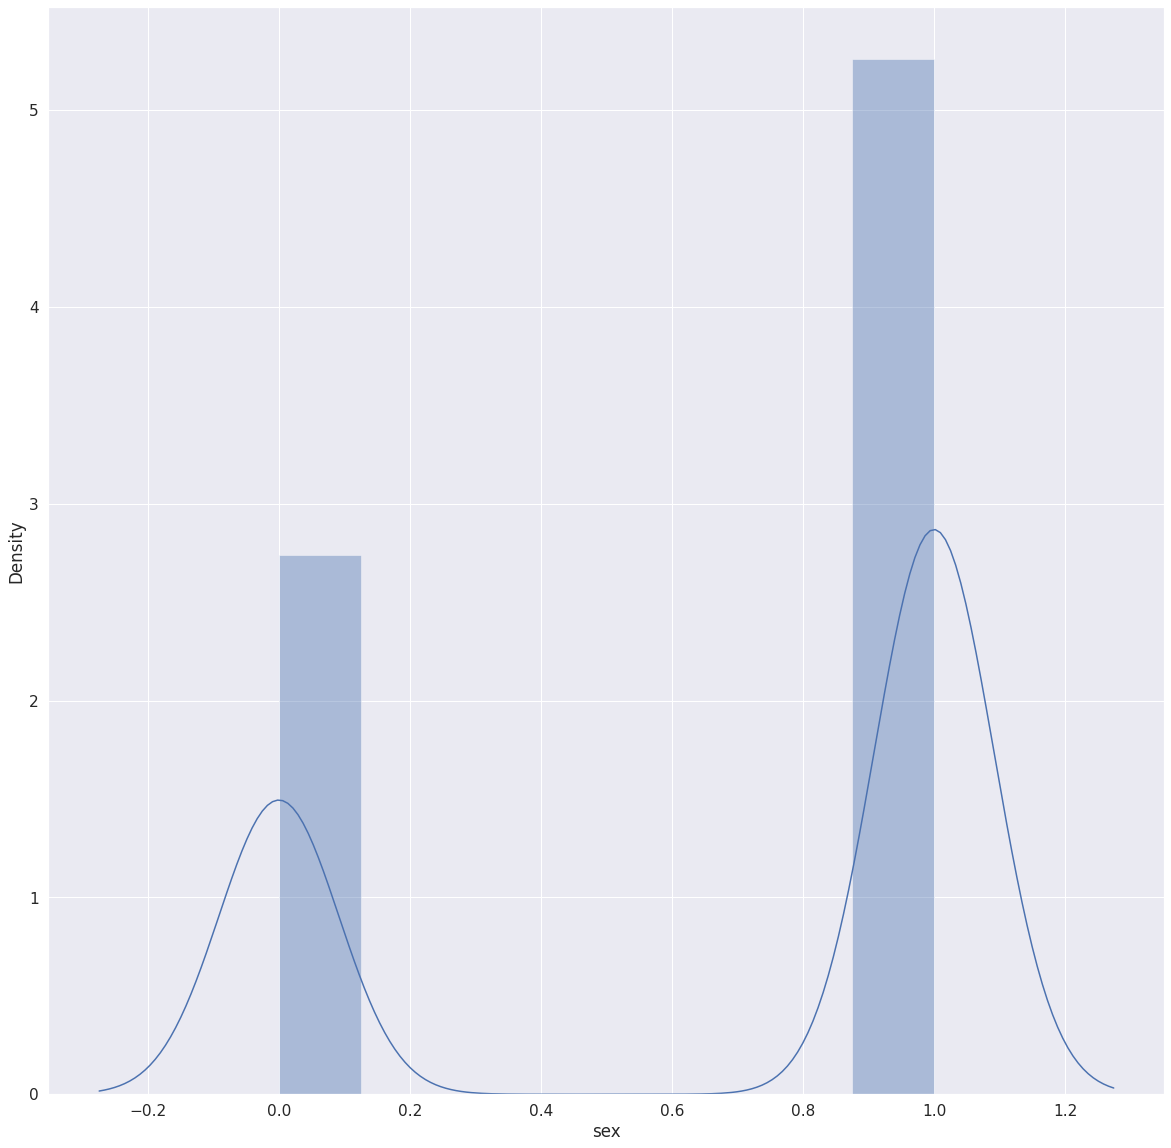

In [360]:
sns.distplot(df['sex'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


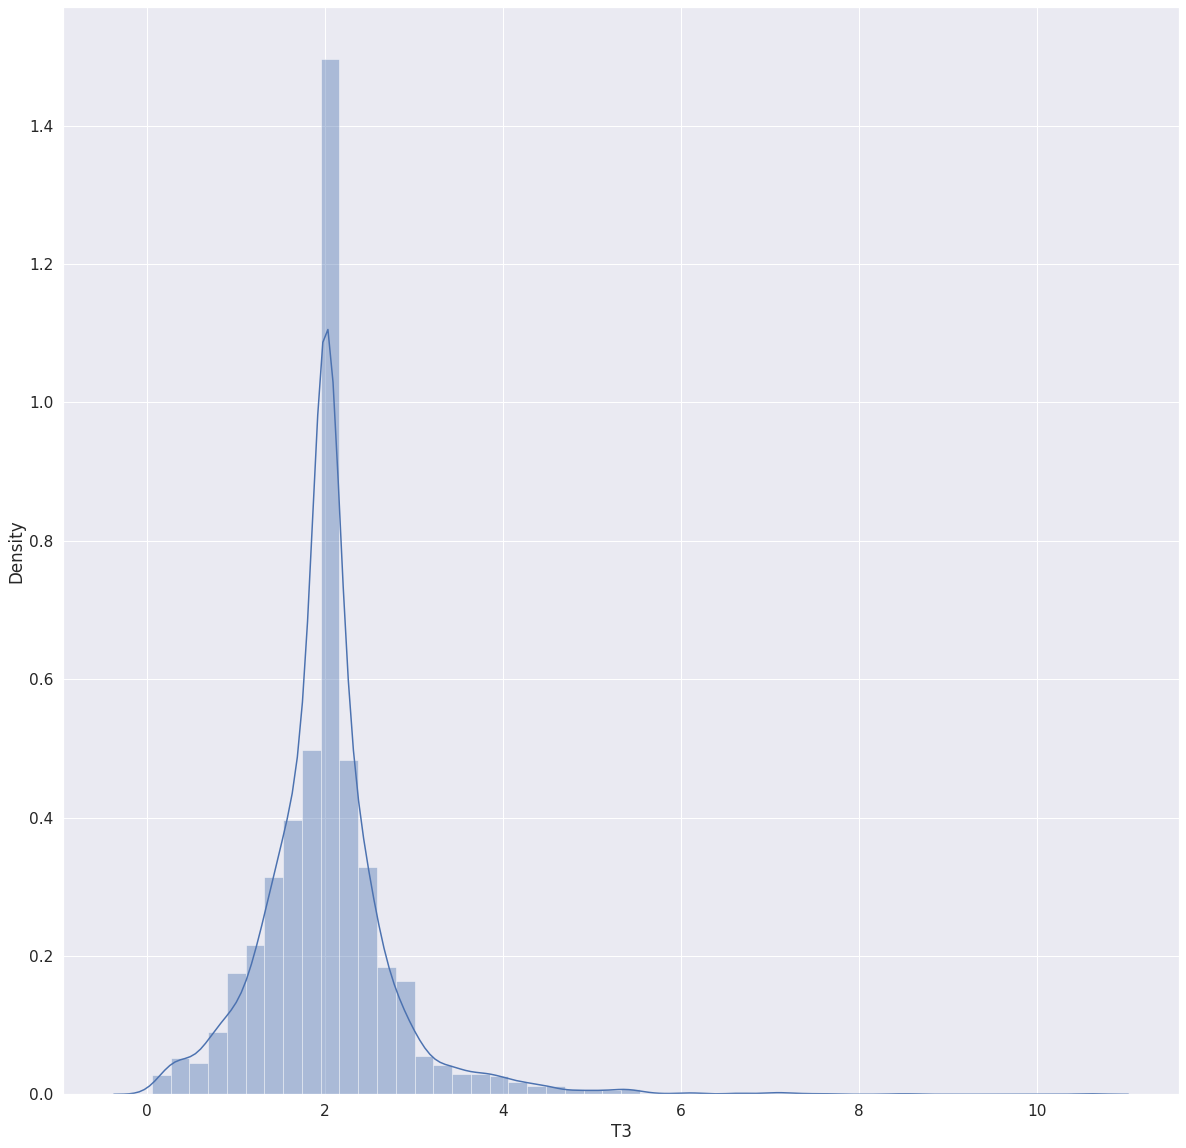

In [361]:
sns.distplot(df['T3'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


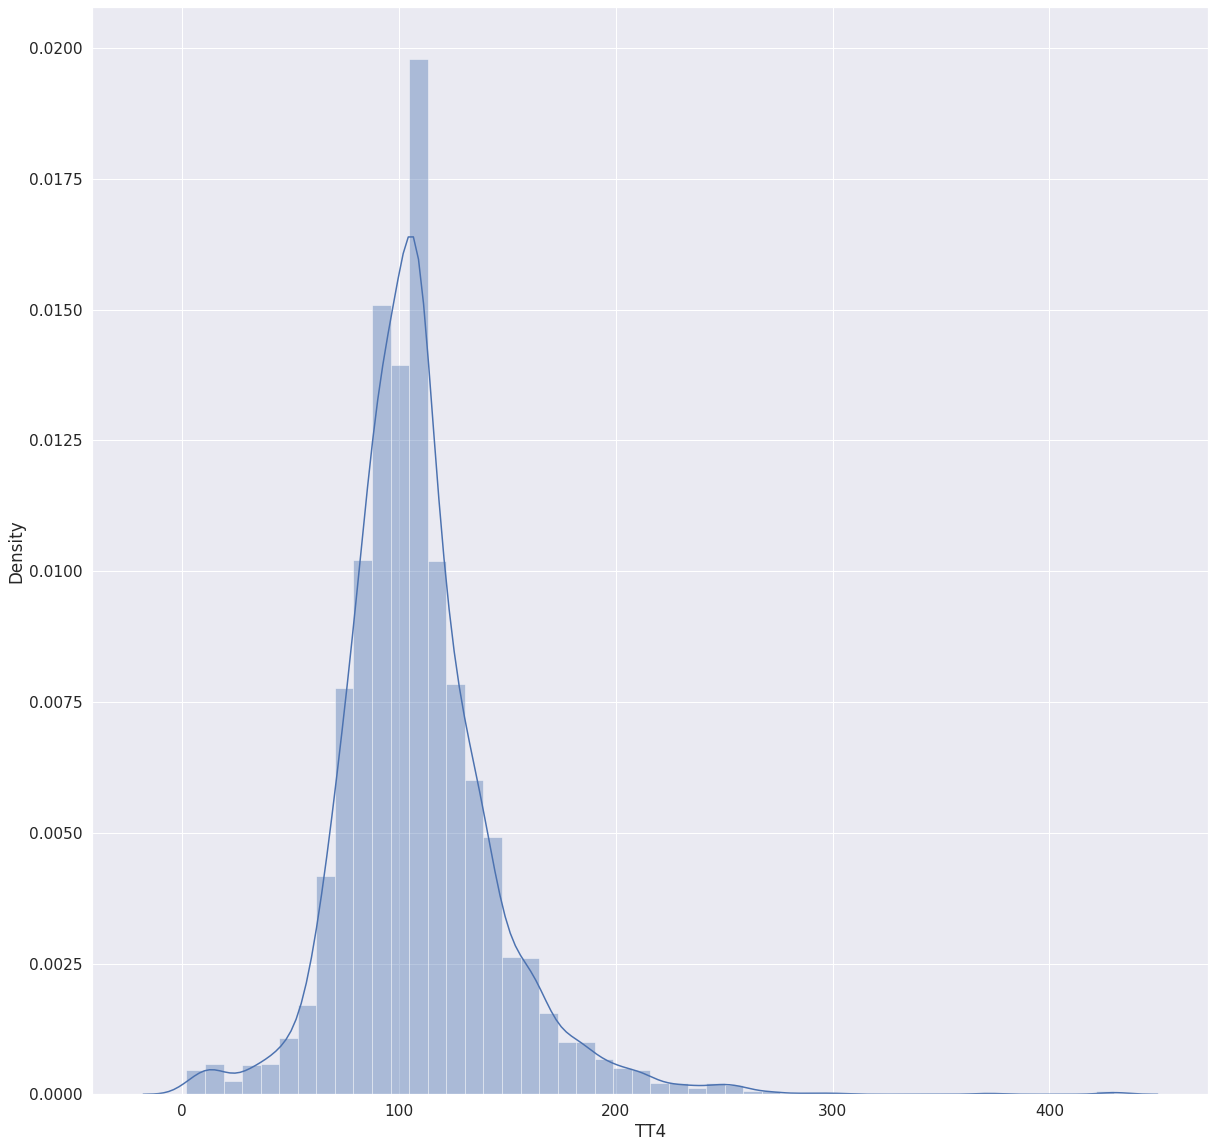

In [362]:
sns.distplot(df['TT4'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


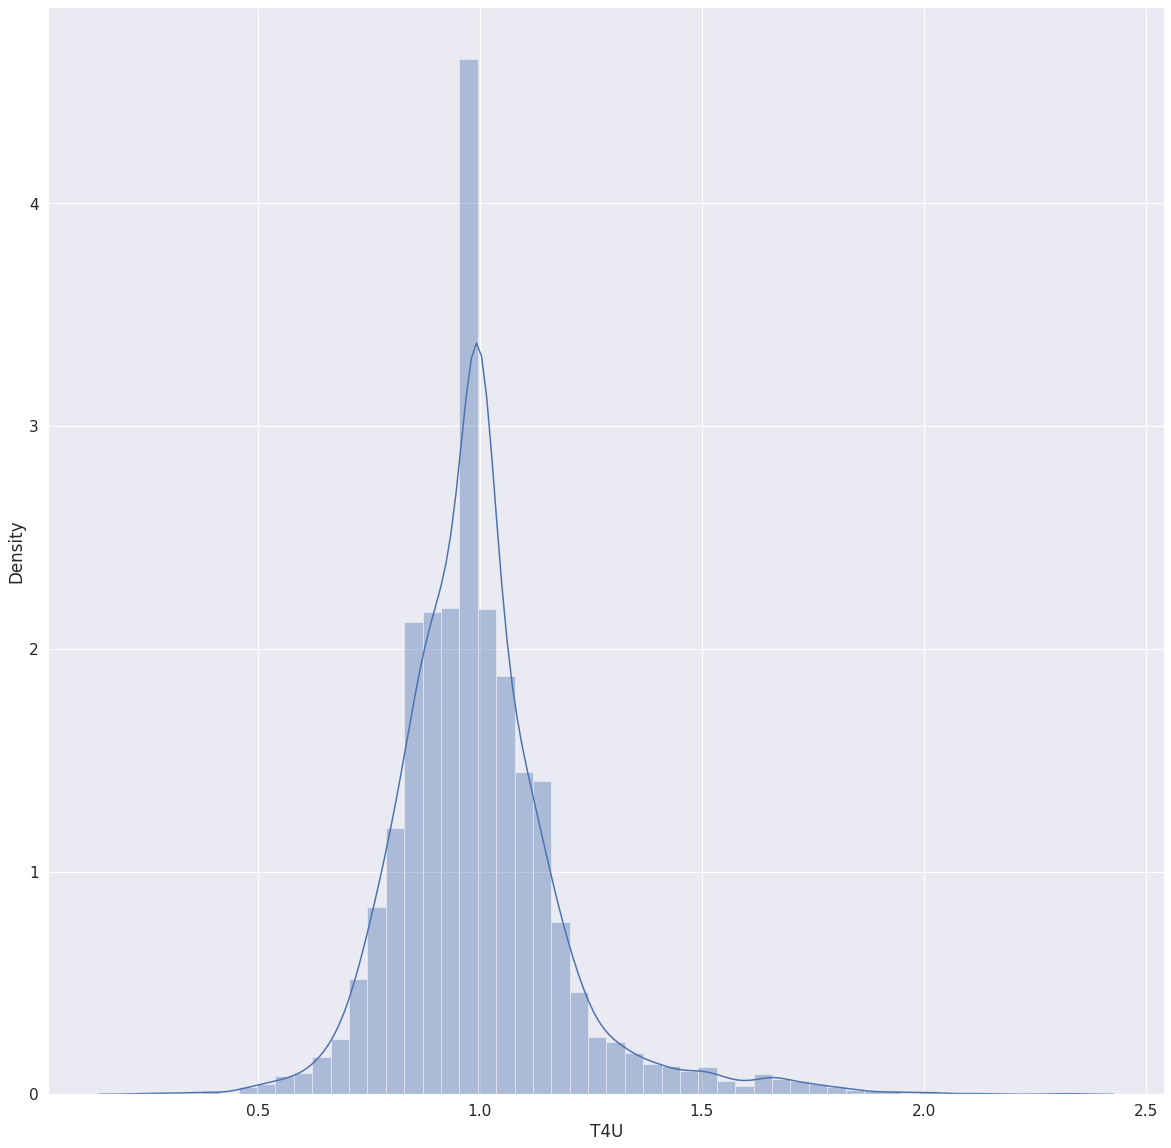

In [363]:
sns.distplot(df['T4U'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


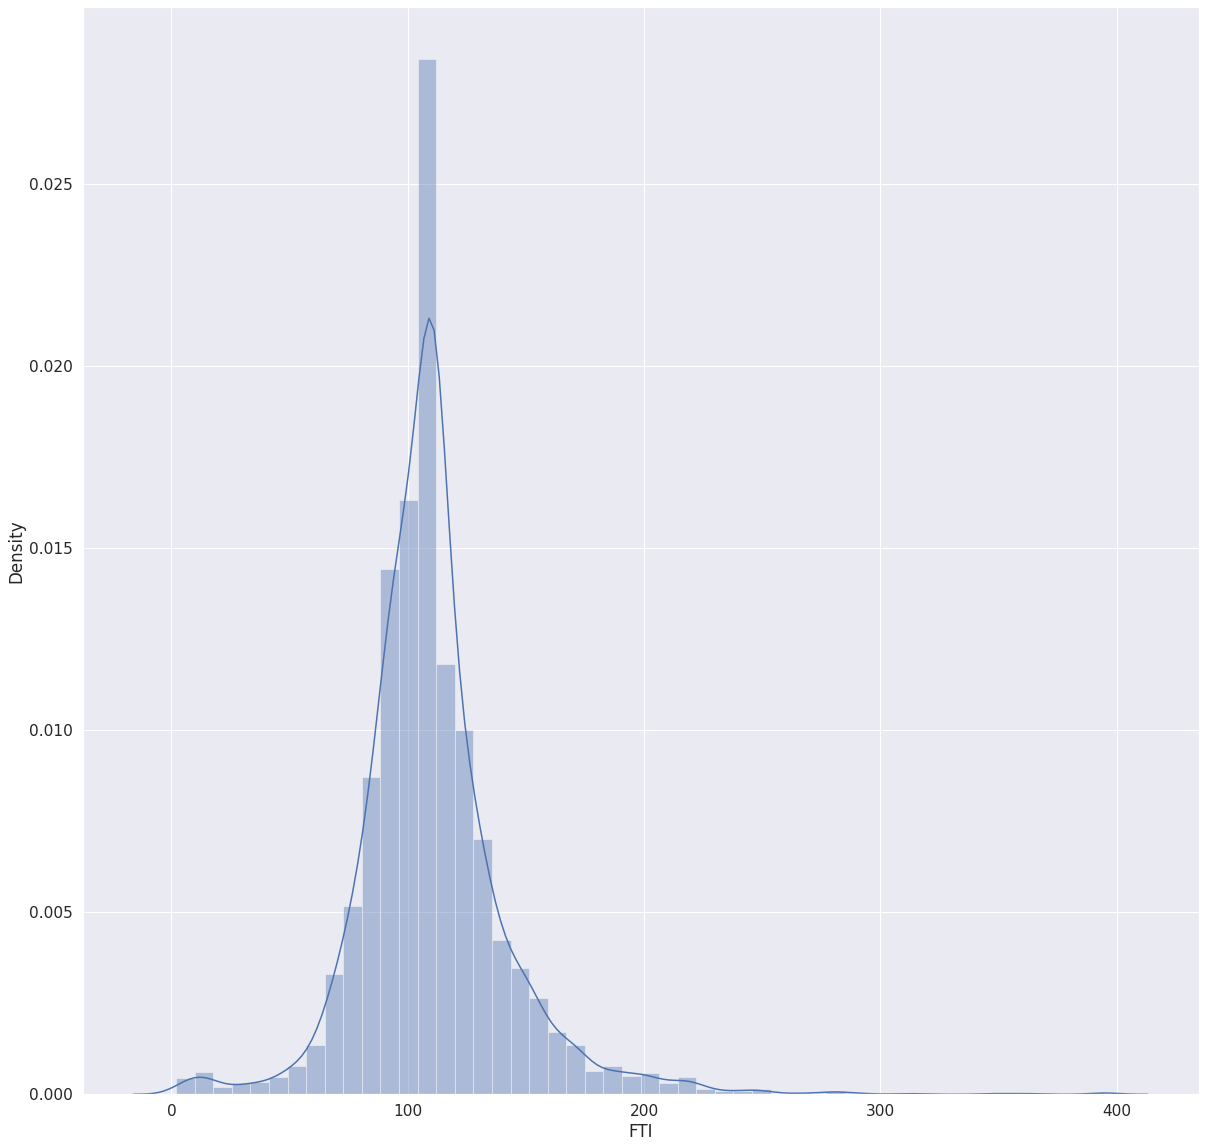

In [364]:
sns.distplot(df['FTI'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


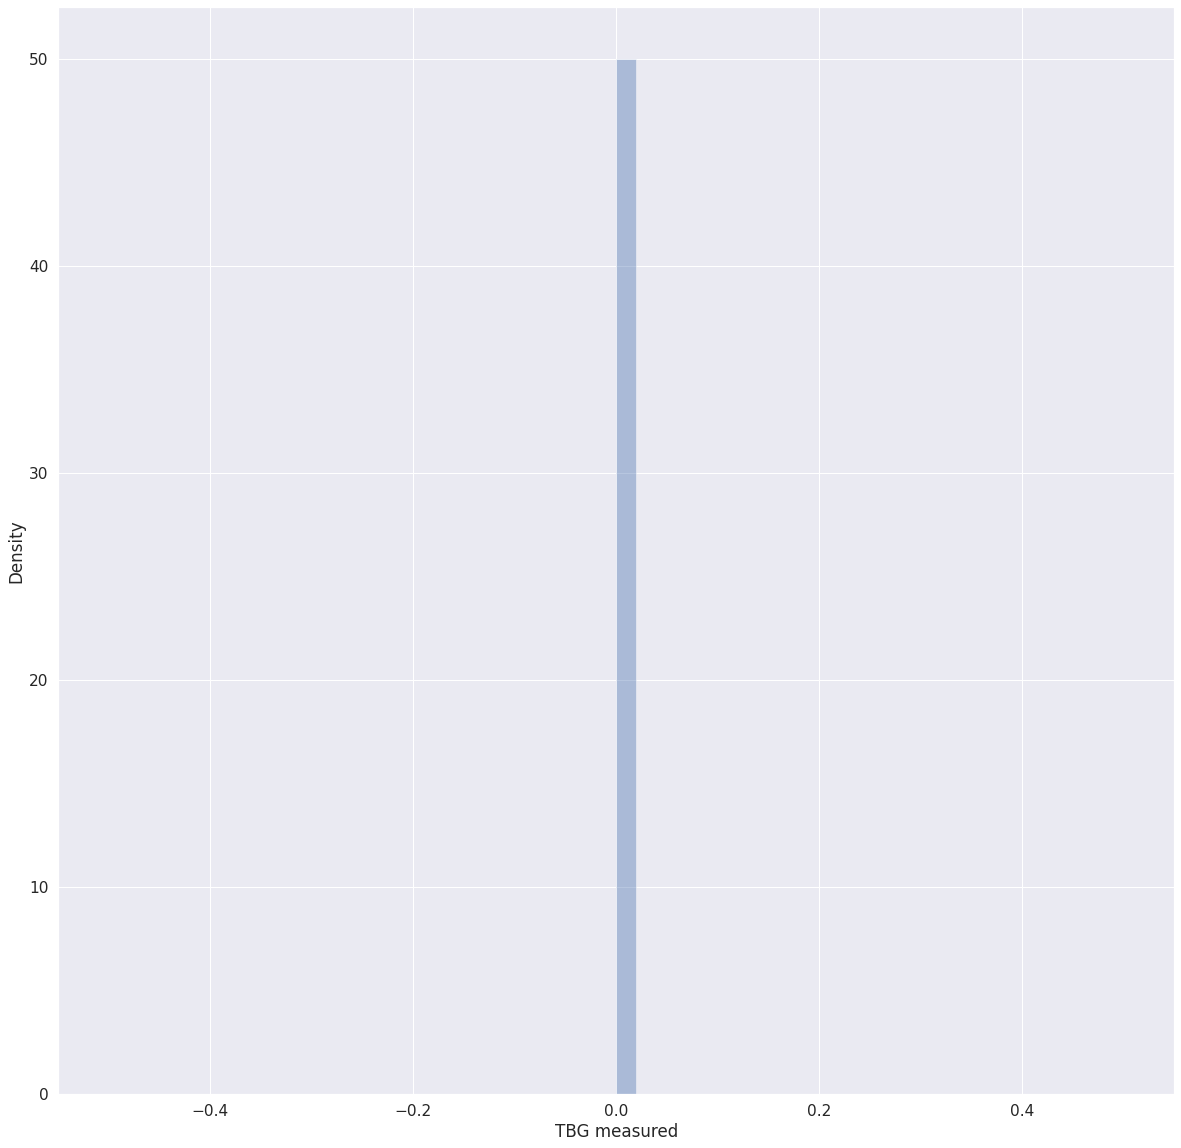

In [365]:
sns.distplot(df['TBG measured'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


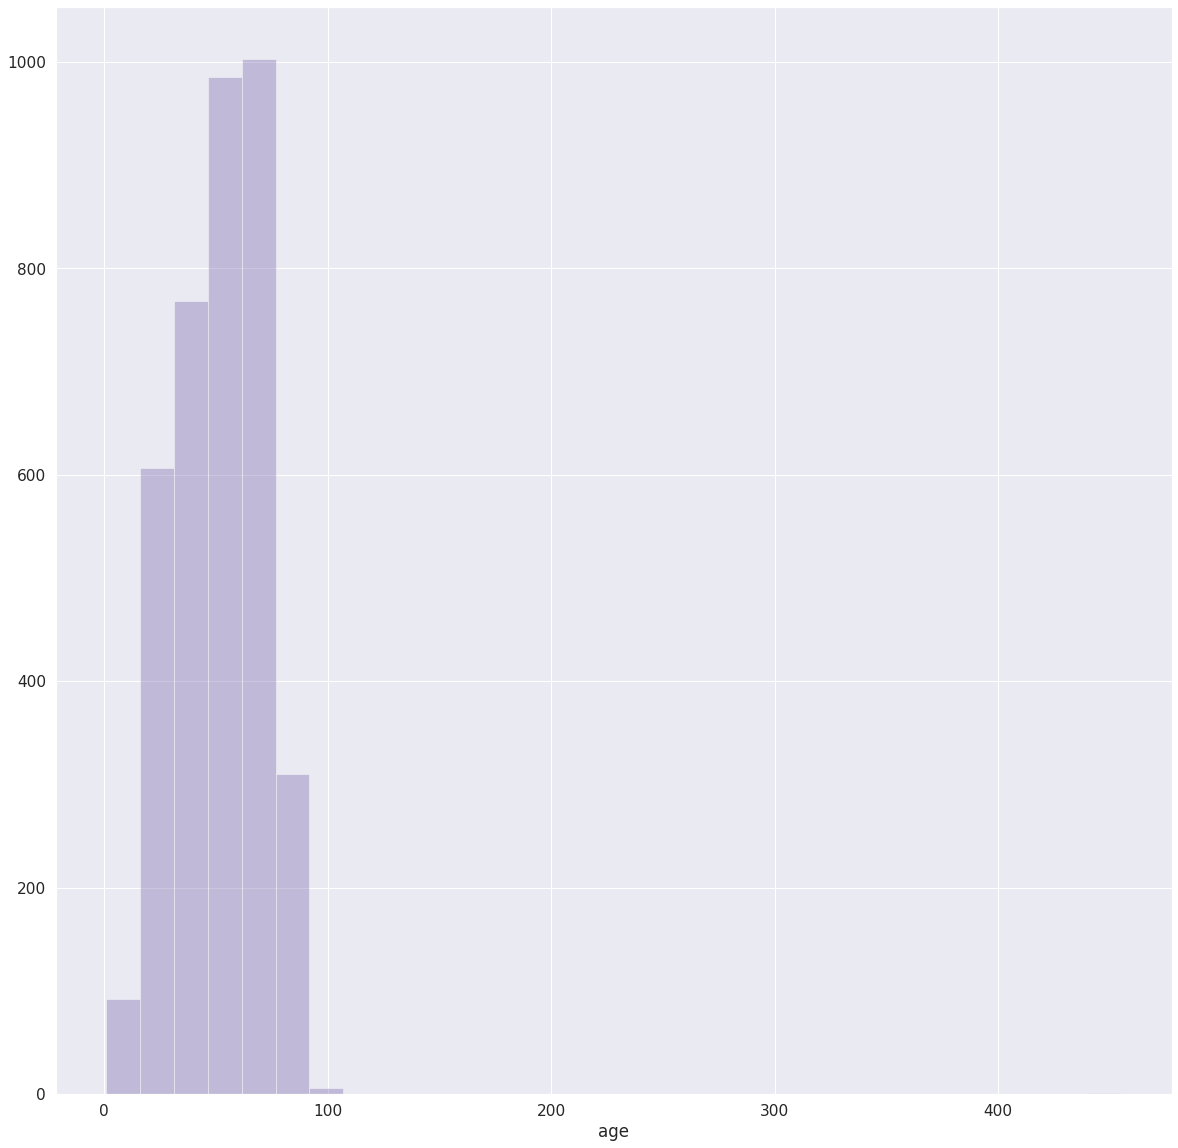

In [366]:
sns.distplot(df['age'], kde=False, bins=30, color='m')

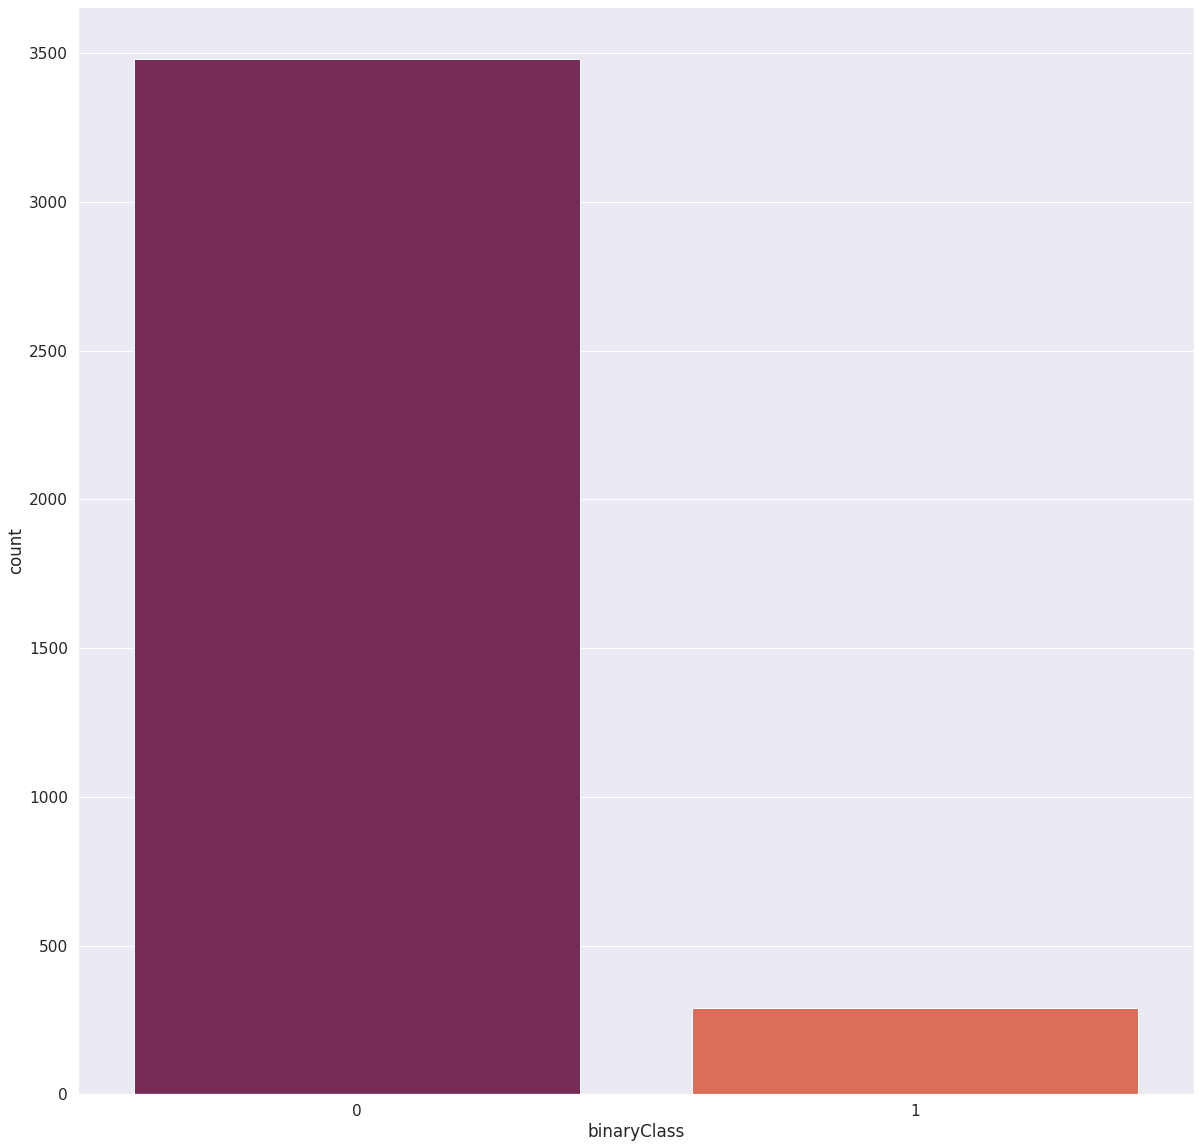

In [367]:
sns.countplot(x='binaryClass', data=df, palette='rocket')

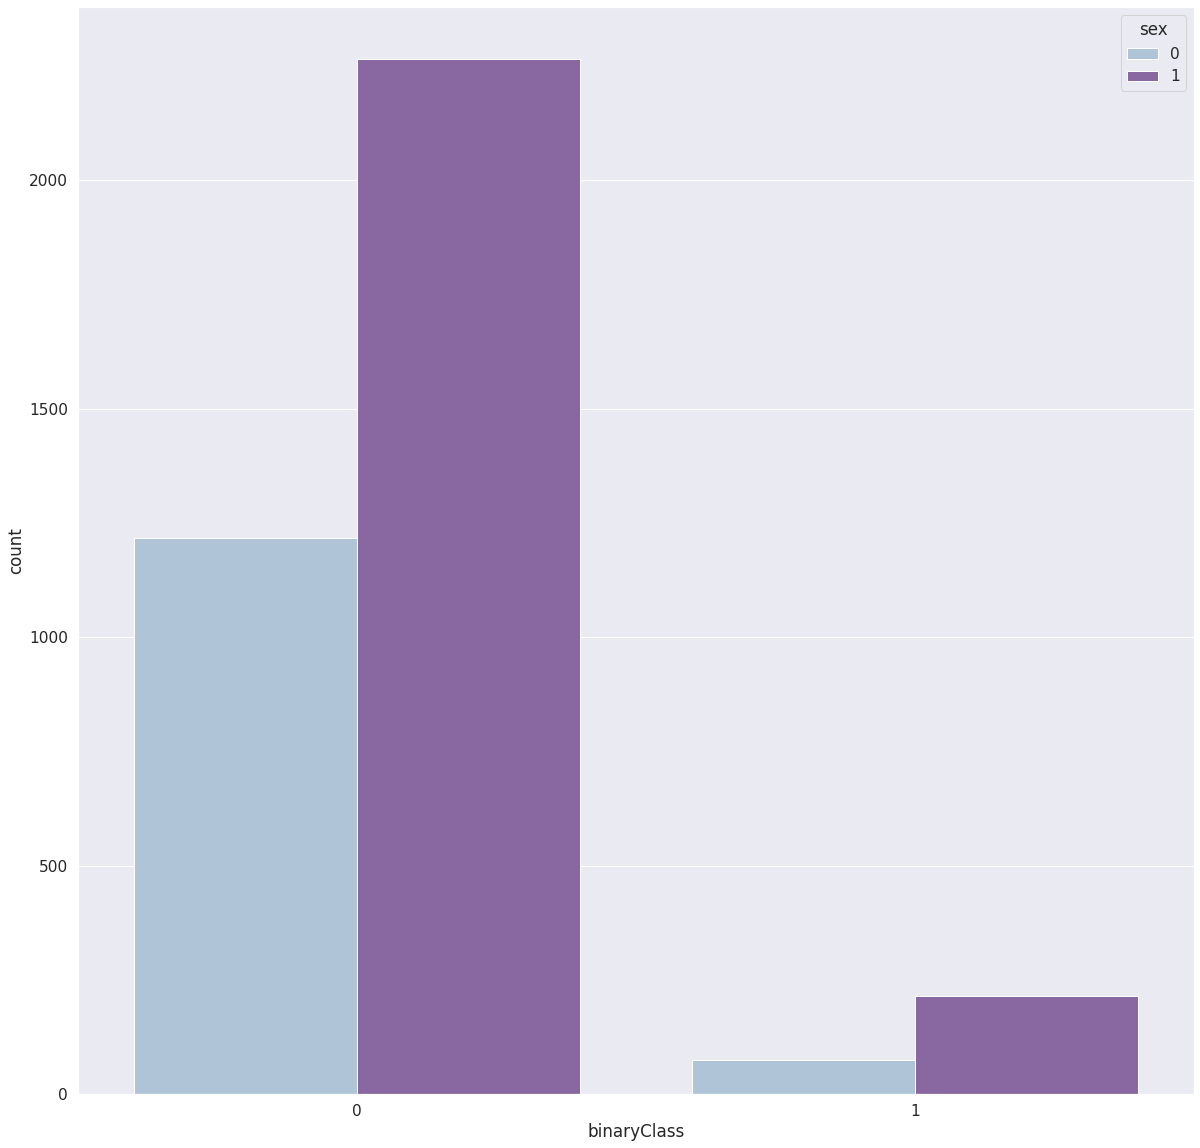

In [368]:
sns.countplot(x='binaryClass', data=df, hue='sex', palette='BuPu')

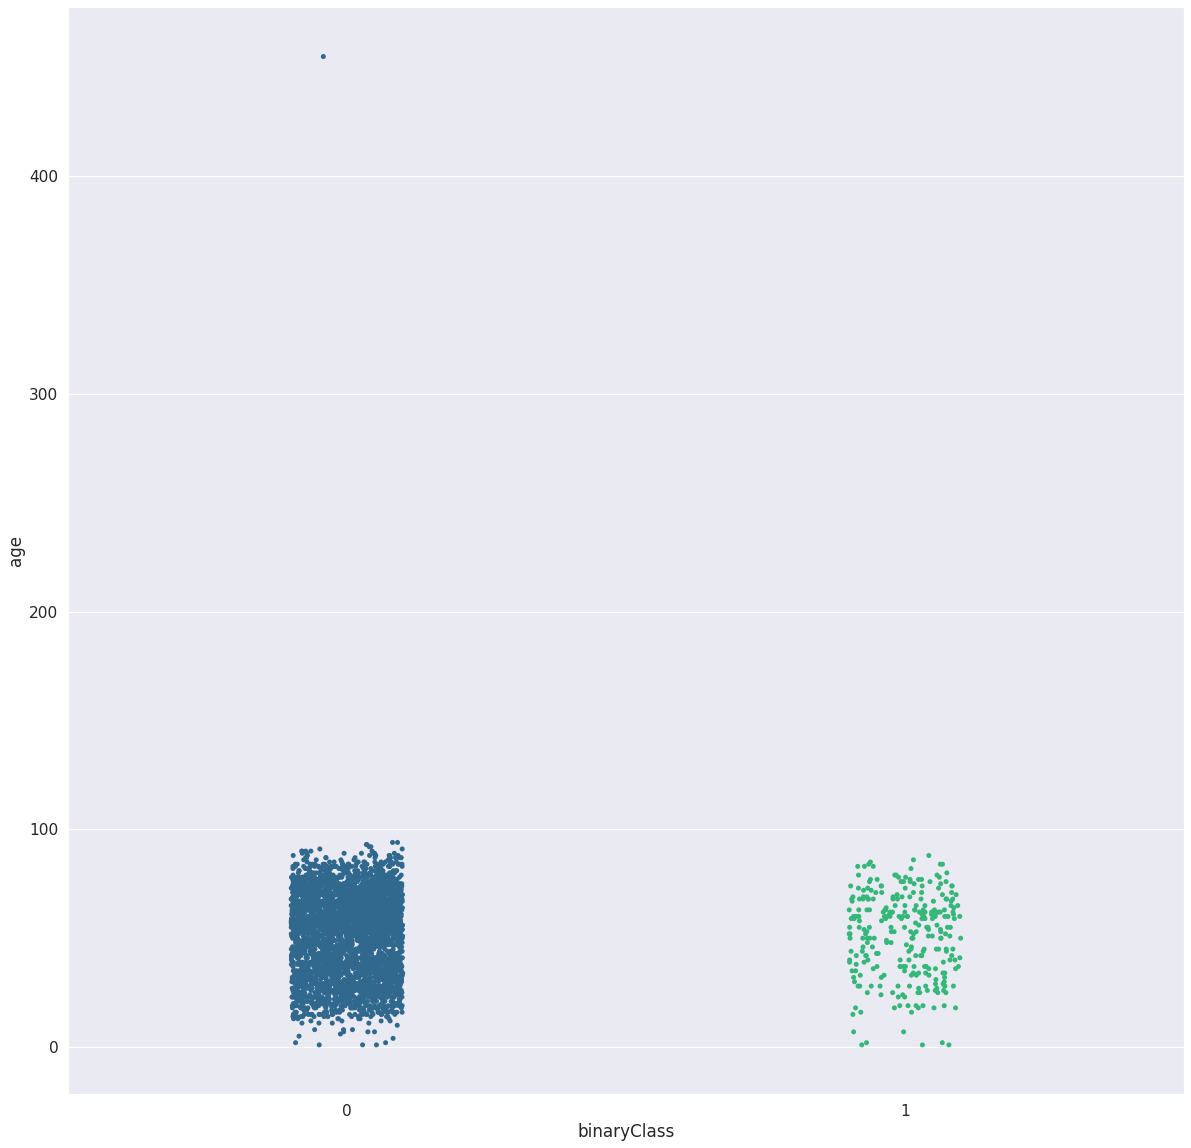

In [369]:
sns.stripplot(x="binaryClass", y="age", data=df, palette="viridis")

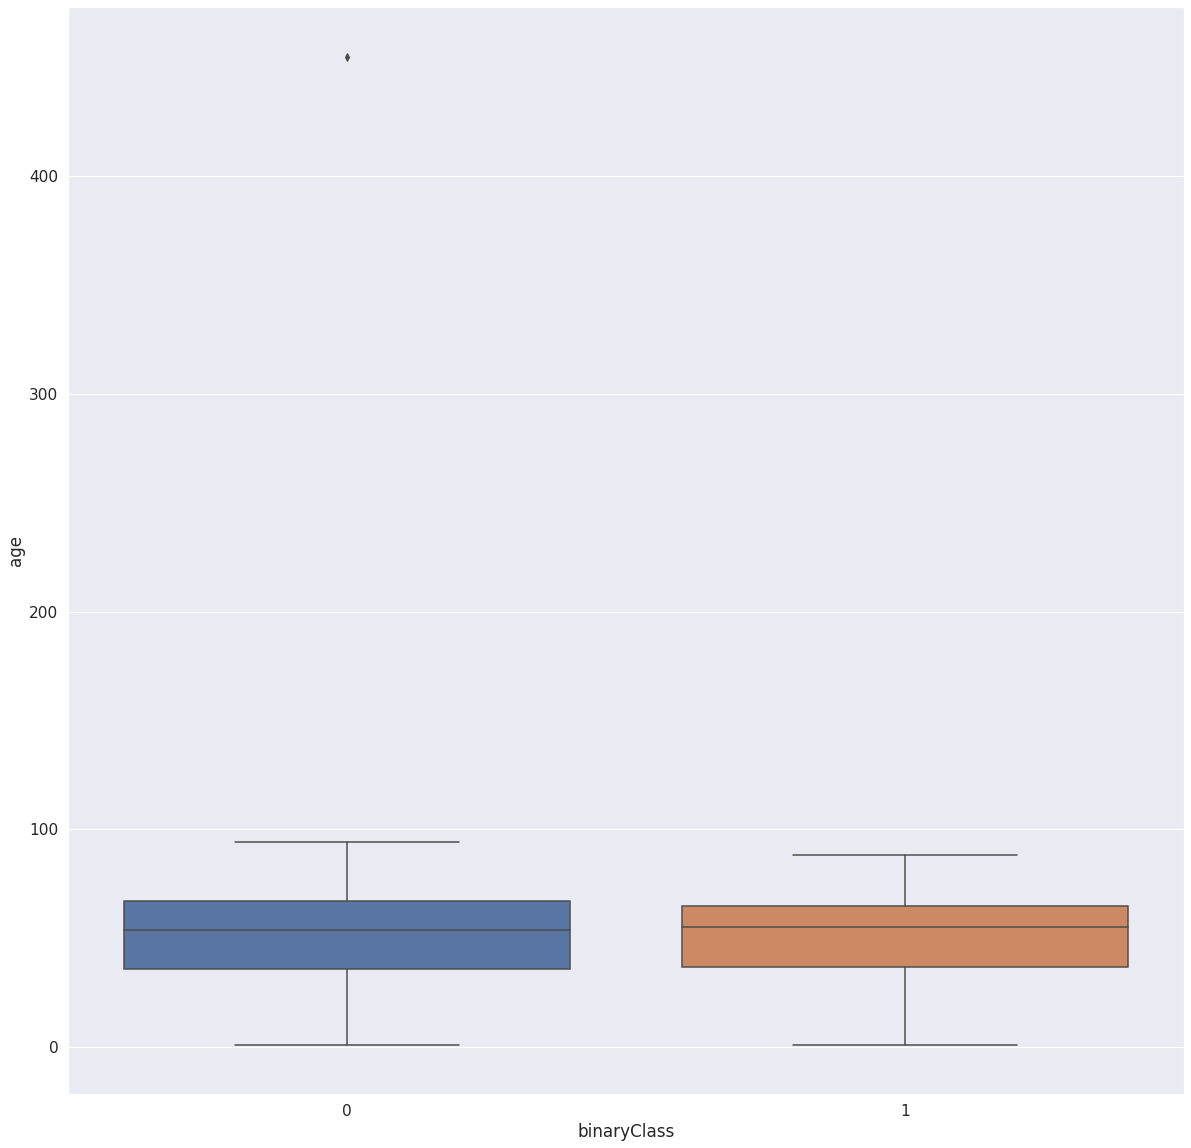

In [370]:
sns.boxplot(x='binaryClass', y='age', data=df)

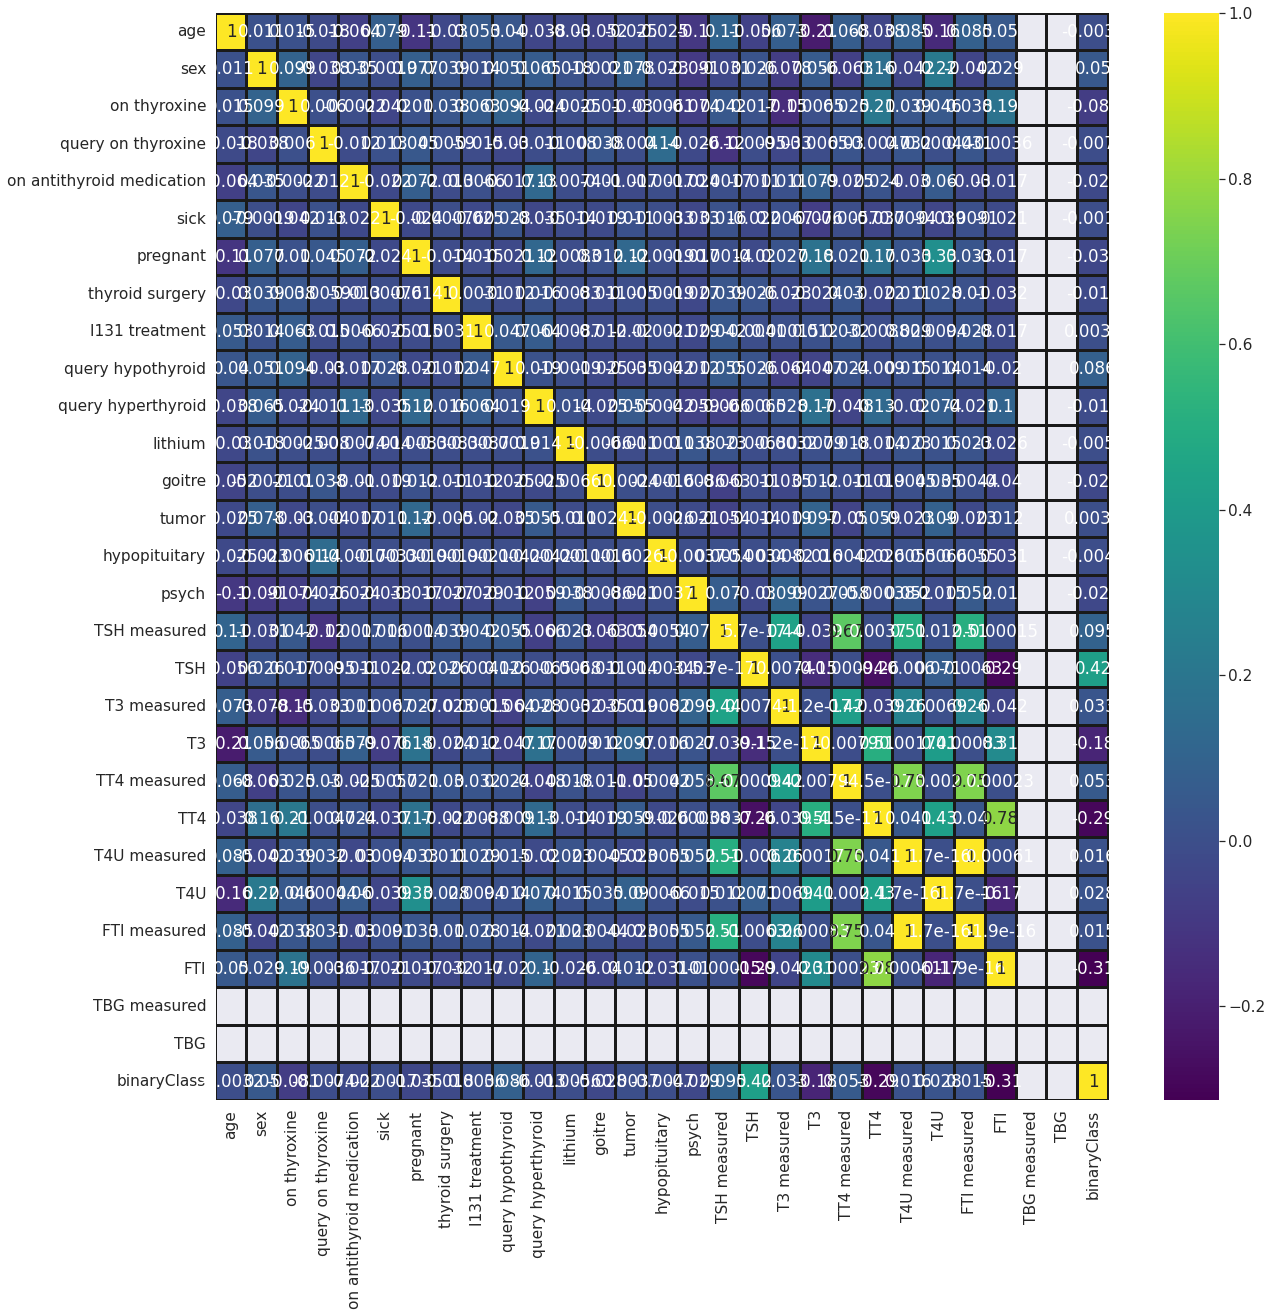

In [371]:
sns.set(rc={'figure.figsize': [20, 20]}, font_scale=1.4)
sns.heatmap(df.corr(), cmap='viridis', linecolor='k', linewidths=2, annot=True)

# Train Test -

In [372]:
df.columns

Index(['age', 'sex', 'on thyroxine', 'query on thyroxine',
       'on antithyroid medication', 'sick', 'pregnant', 'thyroid surgery',
       'I131 treatment', 'query hypothyroid', 'query hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH measured', 'TSH',
       'T3 measured', 'T3', 'TT4 measured', 'TT4', 'T4U measured', 'T4U',
       'FTI measured', 'FTI', 'TBG measured', 'TBG', 'binaryClass'],
      dtype='object')

In [373]:
# Defining X and y. y is to be predicted. which is Price of the Car.
X = df[['age', 'sex', 'on thyroxine', 'query on thyroxine',
       'on antithyroid medication', 'sick', 'pregnant', 'thyroid surgery',
       'I131 treatment', 'query hypothyroid', 'query hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH measured', 'TSH',
       'T3 measured', 'T3', 'TT4 measured', 'TT4', 'T4U measured', 'T4U',
       'FTI measured', 'FTI', 'TBG measured']]
y = df['binaryClass']

In [374]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=2529,train_size=0.7)

In [375]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

In [376]:
y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)

In [383]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

In [378]:
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [379]:
y_pred = model.predict(X_test)

In [384]:
from sklearn.metrics import classification_report, confusion_matrix

cm = confusion_matrix(y_test,y_pred)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1042
           1       0.96      0.53      0.69        90

    accuracy                           0.96      1132
   macro avg       0.96      0.77      0.83      1132
weighted avg       0.96      0.96      0.96      1132



In [385]:
mean_absolute_error(y_test,y_pred)

0.038869257950530034

In [387]:
r2_score(y_test, y_pred)

0.4688846235871188